# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.142748e+01     1.576893e+01
 * time: 0.0030069351196289062
     1     6.161939e+01     9.376019e+00
 * time: 0.009009838104248047
     2     5.523377e+01     1.157129e+01
 * time: 0.02217888832092285
     3     3.988193e+01     9.463393e+00
 * time: 0.04022383689880371
     4     2.993244e+01     9.417267e+00
 * time: 0.05809378623962402
     5     2.573025e+01     7.424729e+00
 * time: 0.07322287559509277
     6     1.178477e+01     2.588591e+00
 * time: 0.14158296585083008
     7     1.037374e+01     4.910528e+00
 * time: 0.15186285972595215
     8     9.335727e+00     3.800719e+00
 * time: 0.16478395462036133
     9     8.460116e+00     3.904267e+00
 * time: 0.1775379180908203
    10     7.073204e+00     3.141218e+00
 * time: 0.1899728775024414
    11     6.584750e+00     2.181648e+00
 * time: 0.2001798152923584
    12     6.196191e+00     1.555100e+00
 * time: 0.21044397354125977
    13     6.016642e+00     1.089969e+00
 * time:

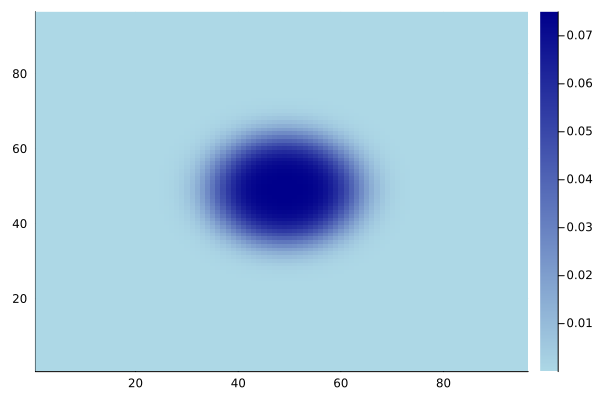

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)